# [B 1]

In [1]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import csv

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.neighbors import KernelDensity 
from sklearn import tree
import pandas as pd
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



# [B 2]

# Feature Exraction

In [ ]:

'''
   #####################
   # feature exraction #
   #####################    
'''

header = 'filename chroma_stft rms spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'

for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()


file = open('data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'ney piano santour setar tar violon'.split()

for g in genres:
    for filename in os.listdir(f'E:\_Tehran University\Term 1\ML\Project\DATA\MLDATAG2_OGG(all)\{g}'):
        songname = f'E:\_Tehran University\Term 1\ML\Project\DATA\MLDATAG2_OGG(all)\{g}\{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rms = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rms)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

# Number of Feature that extracted  : 26

# data matrix is (1490,28)


# Reading data from CSV file

# [B 3]

In [2]:
data = pd.read_csv('data.csv')
data.head()

,filename,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,10.ogg,0.172109,0.160323,1364.344456,1258.592175,2237.128139,0.076699,-252.416428,121.376038,-75.999443,...,-10.225346,-11.382644,-23.615202,-9.837443,2.837608,7.311616,15.285730,28.113136,13.851759,ney
1,100.ogg,0.144347,0.397188,2667.270693,2562.900506,5860.672895,0.071928,-121.873596,7.836360,-47.482792,...,11.913527,-2.081229,-12.192745,-2.550208,-0.366075,-2.494725,-1.881683,10.741643,5.378603,ney
2,101.ogg,0.143907,0.423747,2311.350857,2466.870951,5187.210300,0.058621,-146.173828,25.193405,-30.676767,...,13.588500,5.091373,-0.937903,-6.645022,-1.869061,-8.361086,-9.584910,-7.565945,-4.581150,ney
3,102.ogg,0.135277,0.415720,2359.148504,2448.678542,5272.793116,0.066651,-116.191879,33.266212,-30.781305,...,9.540560,-13.354314,-11.329946,-11.759642,-0.385233,-4.925459,2.783390,13.298392,7.341113,ney
4,103.ogg,0.146942,0.357927,1648.908938,2048.969301,3375.387923,0.056880,-142.883560,76.426750,-19.965134,...,-9.485208,-11.305043,-8.059875,-7.315244,1.998333,-7.306895,-9.482360,-3.459121,-2.967434,ney


# Dropping unneccesary columns

# [B 4]

In [3]:
data = data.drop(['filename'],axis=1)
data.head()
# file name can drop

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.172109,0.160323,1364.344456,1258.592175,2237.128139,0.076699,-252.416428,121.376038,-75.999443,-21.006634,...,-10.225346,-11.382644,-23.615202,-9.837443,2.837608,7.311616,15.285730,28.113136,13.851759,ney
1,0.144347,0.397188,2667.270693,2562.900506,5860.672895,0.071928,-121.873596,7.836360,-47.482792,-31.510834,...,11.913527,-2.081229,-12.192745,-2.550208,-0.366075,-2.494725,-1.881683,10.741643,5.378603,ney
2,0.143907,0.423747,2311.350857,2466.870951,5187.210300,0.058621,-146.173828,25.193405,-30.676767,-15.189541,...,13.588500,5.091373,-0.937903,-6.645022,-1.869061,-8.361086,-9.584910,-7.565945,-4.581150,ney
3,0.135277,0.415720,2359.148504,2448.678542,5272.793116,0.066651,-116.191879,33.266212,-30.781305,-19.073294,...,9.540560,-13.354314,-11.329946,-11.759642,-0.385233,-4.925459,2.783390,13.298392,7.341113,ney
4,0.146942,0.357927,1648.908938,2048.969301,3375.387923,0.056880,-142.883560,76.426750,-19.965134,-5.031665,...,-9.485208,-11.305043,-8.059875,-7.315244,1.998333,-7.306895,-9.482360,-3.459121,-2.967434,ney


### Create List of Labels by numbers

# [B 5]

In [38]:
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)
print(y)

[0 0 0 ... 5 5 5]


# Normalizing & Standaradining DataSet

# [B 6]

In [82]:
''' 
    Normalizing the dataset
    For normalizing data :
        
        Method 1:
            use scaler built in

        Method 2:
            manual and use Center and Standardize

'''

# scaler = StandardScaler()
# X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

def center(X):
    newX = X - np.mean(X , axis = 0)
    return newX
def Standardize (X):
    newx= center(X)/np.std(X, axis=0)
    return newx

X_array= np.array(data.iloc[:, :-1], dtype = float)
X_centered =center(X_array)
X = Standardize(X_centered)


# decision Tree

# [B 7]

Accuracy: 0.6286353467561522


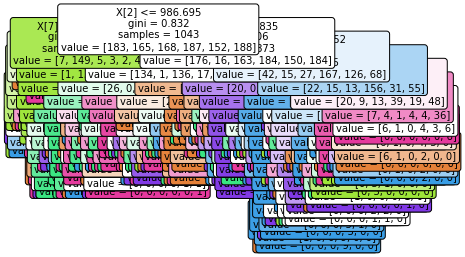

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

tree.plot_tree(clf , fontsize= 10, filled= 'g' ,rounded=True )

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# LDA for Decision Tree

# [B 8]

Accuracy: 0.5592841163310962


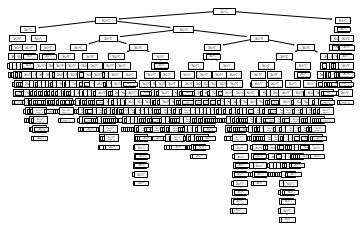

In [85]:

lda = LinearDiscriminantAnalysis(n_components= 2)
Xr2 = lda.fit (X,y).transform(X)

X_train, X_test, y_train, y_test = train_test_split(Xr2, y, test_size=0.3, random_state=1)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn import tree
tree.plot_tree(clf)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Boosting Method

# [B 9]

Learning rate:  0.05
Accuracy score (training): 0.793
Accuracy score (validation): 0.734
----------------
Learning rate:  0.075
Accuracy score (training): 0.806
Accuracy score (validation): 0.749
----------------
Learning rate:  0.1
Accuracy score (training): 0.832
Accuracy score (validation): 0.765
----------------
Learning rate:  0.25
Accuracy score (training): 0.903
Accuracy score (validation): 0.799
----------------
Learning rate:  0.5
Accuracy score (training): 0.957
Accuracy score (validation): 0.794
----------------
Learning rate:  0.75
Accuracy score (training): 0.987
Accuracy score (validation): 0.763
----------------
Learning rate:  1
Accuracy score (training): 0.987
Accuracy score (validation): 0.761
----------------
###############################
Best Learning Rate is : 0.25
Maximum Accuracy is : 0.7986577181208053


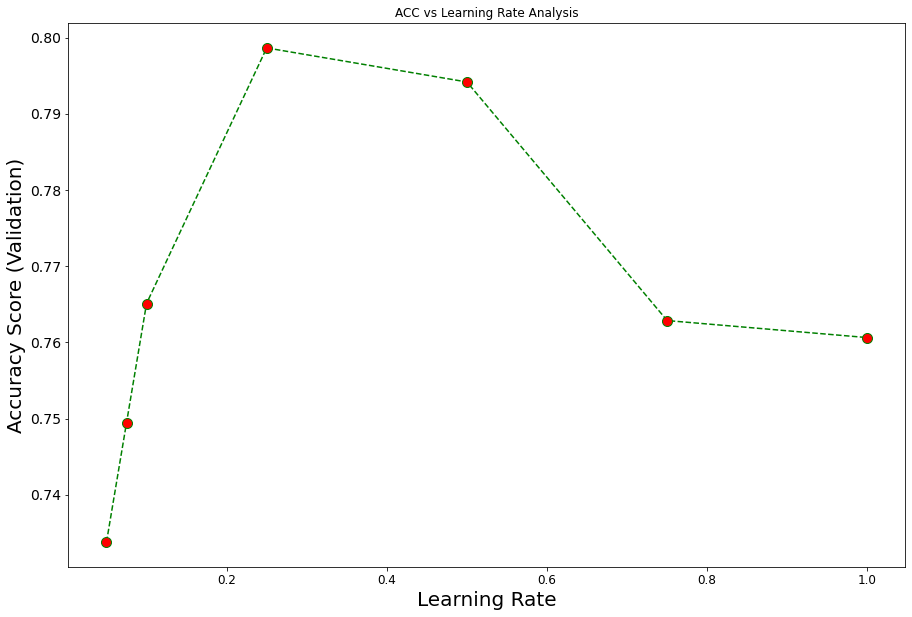

In [101]:

from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
Lr=[]
accval=[]
OptLrRate = 0
MaxAcc=0

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=30, learning_rate=learning_rate,
                                        max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)
    Lr.append(learning_rate)
    accval.append(gb_clf.score(X_test, y_test))
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))
    print('----------------')
    if gb_clf.score(X_test, y_test)>MaxAcc:
        MaxAcc=gb_clf.score(X_test, y_test)
        OptLrRate = learning_rate
print('###############################')
print("Best Learning Rate is :" , OptLrRate)
print ("Maximum Accuracy is :",MaxAcc)

plt.figure(figsize = (15 , 10))
plt.plot(Lr,accval  , color = 'green' , linestyle = 'dashed' 
         , marker ='o' , markerfacecolor = 'red' , markersize = 10)
plt.xticks(fontsize = 12)
plt.title('ACC vs Learning Rate Analysis')
plt.yticks(fontsize = 14)
plt.xlabel('Learning Rate' , fontsize = 20)
plt.ylabel ('Accuracy Score (Validation)' , fontsize = 20)

plt.show()
